In [5]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.applications import ResNet50, VGG16
import keras_tuner as kt
# import torch
# import torchvision
# import torchvision.transforms as transforms

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'og_data',
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(300, 500))

val_ds = tf.keras.utils.image_dataset_from_directory(
  'og_data',
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(300, 500))


Found 200 files belonging to 5 classes.
Using 140 files for training.


Found 200 files belonging to 5 classes.
Using 60 files for validation.


In [7]:
train_df = tf.keras.utils.image_dataset_from_directory(
  'ten_dino',
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(300, 500))

val_df = tf.keras.utils.image_dataset_from_directory(
  'ten_dino',
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(300, 500))


Found 1030 files belonging to 10 classes.
Using 721 files for training.
Found 1030 files belonging to 10 classes.
Using 309 files for validation.


In [8]:
class_names = train_ds.class_names
class_names


['ankylosaurus', 'brontosaurus', 'pterodactyl', 'trex', 'triceratops']

In [9]:
dino_names = train_df.class_names
dino_names

['Corythosaurus',
 'Dilophosaurus',
 'Spinosaurus',
 'Stegosaurus',
 'Velociraptor',
 'ankylosaurus',
 'brontosaurus',
 'pterodactyl',
 'trex',
 'triceratops']

In [10]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (300, 500, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ])

C:\Users\kjhoa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
base_model = VGG16(include_top = False, weights = "imagenet", input_shape = (300, 500, 3))
base_model.trainable = False

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 300, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 300, 500, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 300, 500, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 150, 250, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 150, 250, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 150, 250, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 75, 125, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 75, 125, 256)   │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 75, 125, 256)   │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 75, 125, 256)   │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 37, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 37, 62, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 37, 62, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 37, 62, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 18, 31, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 18, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 18, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 18, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 9, 15, 512)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 300, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 300, 500, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 300, 500, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 150, 250, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 150, 250, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 150, 250, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 75, 125, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 75, 125, 256)   │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 75, 125, 256)   │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 75, 125, 256)   │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 37, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 37, 62, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 37, 62, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 37, 62, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 18, 31, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 18, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 18, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 18, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 9, 15, 512)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [22]:
model = Sequential()
model.add(data_augmentation)
model.add(layers.Rescaling(1./255, input_shape=(300, 500, 3)),)
for layer in base_model.layers[:11]:
    model.add(layer)
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation = "softmax"))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-5),
              metrics = ["accuracy"])

C:\Users\kjhoa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 300, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_1 (InputLayer)      │ (None, 300, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 300, 500, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 300, 500, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 150, 250, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 150, 250, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 150, 250, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 75, 125, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 75, 125, 256)   │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 75, 125, 256)   │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 75, 125, 256)   │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 37, 62, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,735,488 (6.62 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,735,488 (6.62 MB)

In [18]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

In [19]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 15, callbacks = stop_early)

Epoch 1/15


C:\Users\kjhoa\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 ━━━━━━━━━━━━━━━━━━━━ 66s 14s/step - accuracy: 0.2866 - loss: 5956.4131 - val_accuracy: 0.5500 - val_loss: 1827.4594
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 11s/step - accuracy: 0.7110 - loss: 1550.5474 - val_accuracy: 0.8833 - val_loss: 562.7950
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 11s/step - accuracy: 0.9417 - loss: 103.1809 - val_accuracy: 0.8333 - val_loss: 399.4103
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 58s 12s/step - accuracy: 0.9868 - loss: 42.0356 - val_accuracy: 0.9000 - val_loss: 211.4377
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 57s 12s/step - accuracy: 0.9855 - loss: 22.9380 - val_accuracy: 0.9167 - val_loss: 250.4185
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 11s/step - accuracy: 0.9868 - loss: 2.2091 - val_accuracy: 0.9000 - val_loss: 252.7332
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - accuracy: 0.9668 - loss: 89.6646 - val_accuracy: 0.7667 - val_loss: 1247.3268


In [20]:
# inputs = tf.keras.Input(shape = (300, 500, 3))
# x = data_augmentation(inputs)
# x = layers.Rescaling(1./255, input_shape=(300, 500, 3))(x),
# x = base_model(x)
# x = layers.Flatten()(x)
# x = layers.Dense(128)(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(5, activation = "softmax")(x)
# model = tf.keras.Model(inputs, outputs)
# model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
#               optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-5),
#               metrics = ["accuracy"])

C:\Users\kjhoa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

In [11]:
# history = model.fit(train_ds, validation_data = val_ds, epochs = 15, callbacks = stop_early)

Epoch 1/15


C:\Users\kjhoa\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 ━━━━━━━━━━━━━━━━━━━━ 89s 19s/step - accuracy: 0.1914 - loss: 2.0317 - val_accuracy: 0.3333 - val_loss: 1.4634
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 94s 19s/step - accuracy: 0.3781 - loss: 1.5132 - val_accuracy: 0.7667 - val_loss: 0.9067
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 91s 19s/step - accuracy: 0.5802 - loss: 1.1146 - val_accuracy: 0.8833 - val_loss: 0.6640
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 107s 22s/step - accuracy: 0.7025 - loss: 0.8239 - val_accuracy: 0.8833 - val_loss: 0.6499
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 96s 20s/step - accuracy: 0.7712 - loss: 0.5975 - val_accuracy: 0.9500 - val_loss: 0.4438
Epoch 6/15
2/5 ━━━━━━━━━━━━━━━━━━━━ 44s 15s/step - accuracy: 0.8203 - loss: 0.5488

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (15,) and (7,)

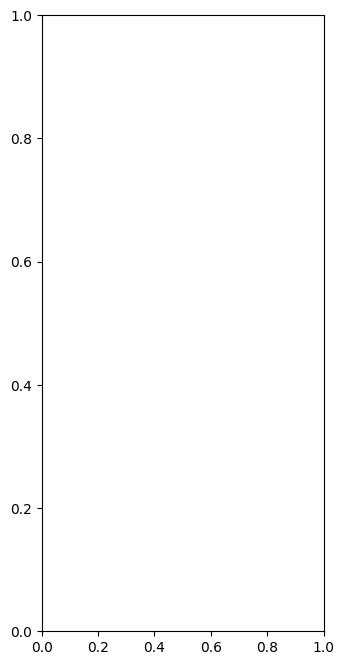

In [24]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()

In [25]:
model.evaluate(val_ds)

ValueError: Layers added to a Sequential model can only have a single positional argument, the input tensor. Layer InputLayer has multiple positional arguments: []

In [18]:

img = tf.keras.utils.load_img(
    'anktest.jpeg', target_size=(300, 500)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
This image most likely belongs to trex with a 38.51 percent confidence.


In [ ]:
base_model10 = VGG16(include_top = False, weights = "imagenet", input_shape = (300, 500, 3))
base_model10.trainable = False

base_model10.summary()

In [ ]:
base_model10.trainable = True
for layer in base_model10.layers[:-4]:
    layer.trainable = False

base_model10.summary()

In [ ]:
inputs = tf.keras.Input(shape = (300, 500, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.vgg16.preprocess_input(x)
x = base_model10(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(dino_names), activation = "softmax")(x)
model10 = tf.keras.Model(inputs, outputs)
model10.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-5),
              metrics = ["accuracy"])

In [ ]:
model10.fit(train_df, validation_data = val_df, epochs = 15)

In [ ]:
model.evaluate(val_df)